This module I will be cleaning up the temperature data, and then also combining the data together into one dataset, so each trial will have the 1830-1875 data relative to their data and then have the actual 1880 through data with the 5 years of missing data shwoing up as NaN

In [162]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")
#RMSE 
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt


In [166]:
#Now load the data in
#Now lets load thedatasets in

Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")
Historical = pd.read_csv(r"C:\Users\jarra\Desktop\Perth_1830_1875_Corrected_Trials_Only.csv")


In [167]:
Historical

date  Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  \
0      1830-04-16 00:00:00   25.1    NaN   25.1    NaN  25.10    NaN   25.1   
1      1830-04-17 00:00:00   25.8   10.7   25.8   10.8  25.80   10.8   25.8   
2      1830-04-18 00:00:00   28.3   13.3   28.3   13.2  28.50   13.0   27.8   
3      1830-04-19 00:00:00   26.7   14.0   26.3   14.0  26.60   13.9   26.3   
4      1830-04-20 00:00:00   24.4    7.8   24.3    7.9  24.20    7.9   24.4   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
16692  1875-12-28 00:00:00   37.8    NaN   38.0    NaN  38.20    NaN   38.2   
16693  1875-12-29 00:00:00   35.4   18.7   35.4   18.0  35.64   18.1   35.8   
16694  1875-12-30 00:00:00   33.0   17.2   33.0   13.4  33.00   13.4   33.0   
16695  1875-12-31 00:00:00   25.7   15.1   25.5   14.1  25.70   14.1   25.7   
16696  1876-01-01 00:00:00    NaN   14.4    NaN   14.5    NaN   14.4    NaN   

       Min_4  Max_5  ...  Max_996  Min_996  Max_997  Min_997  Max_998  \
0        NaN  25.10  ...  25.1000      NaN  25.1000      NaN     25.1   
1       11.5  25.80  ...  25.8000     10.6  25.8000     10.6     25.8   
2       13.3  28.20  ...  28.4000     13.0  28.3000     13.0     27.8   
3       14.1  26.30  ...  26.2000     14.0  26.3000     14.0     26.6   
4        7.8  24.40  ...  24.4000      7.8  24.3605      7.7     24.4   
...      ...    ...  ...      ...      ...      ...      ...      ...   
16692    NaN  38.20  ...  38.1715      NaN  38.2000      NaN     37.8   
16693   18.1  35.64  ...  35.7000     18.1  35.8000     18.1     35.4   
16694   13.4  33.00  ...  33.0000     13.4  33.0000     13.4     33.0   
16695   14.1  25.70  ...  25.7000     14.1  25.8000     14.1     25.7   
16696   14.4    NaN  ...      NaN     14.4      NaN     14.4      NaN   

       Min_998  Max_999  Min_999  Max_1000  Min_1000  
0          NaN     25.1      NaN     25.10       NaN  
1         10.7     25.8     10.9     25.80      10.6  
2         13.0     28.2     13.4     28.10      13.2  
3         13.9     26.4     14.1     26.20      13.9  
4          7.8     24.4      7.8     24.40       7.8  
...        ...      ...      ...       ...       ...  
16692      NaN     38.0      NaN     38.10       NaN  
16693     18.7     35.4     18.1     35.64      18.7  
16694     17.3     32.9     13.4     33.00      17.2  
16695     15.3     25.7     14.1     25.70      15.3  
16696     14.4      NaN     14.5       NaN      14.4  

[16697 rows x 2001 columns]

In [170]:
Present 



#pd.read_csv(r"C:\Users\jarra\Desktop\DATA BACKUP\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")
#Historical = pd.read_csv(r"C:\Users\jarra\Desktop\Perth_1830_1875_Corrected_Trials_Only.csv")
#Present['date'] = pd.to_datetime(Present['date'],format = "%Y-%m-%d")
Present.set_index('date').loc["1904-01-01":"1905-01-01"].head(50)

tmax  tmin
date                  
1904-01-01  23.6  12.5
1904-01-02  28.5  11.0
1904-01-03  33.0  14.9
1904-01-04  35.9  19.6
1904-01-05  39.8  20.2
1904-01-06  35.5  19.7
1904-01-07  25.5  16.7
1904-01-08  22.3  13.7
1904-01-09  23.8  12.9
1904-01-10  29.3  13.0
1904-01-11  35.8  18.2
1904-01-12  38.1  19.6
1904-01-13  38.7  21.7
1904-01-14  32.5  16.4
1904-01-15  30.3  14.3
1904-01-16  29.5  17.1
1904-01-17  29.2  15.9
1904-01-18  32.3  16.5
1904-01-19  31.0  16.1
1904-01-20  32.2  14.0
1904-01-21  33.8  12.9
1904-01-22  35.9  17.2
1904-01-23  36.1  16.9
1904-01-24  30.6  15.9
1904-01-25  27.6  12.7
1904-01-26  30.8  15.9
1904-01-27  34.4  15.6
1904-01-28  35.7  22.3
1904-01-29  26.5  17.2
1904-01-30  24.9  14.1
1904-01-31  25.1  11.4
1904-02-01  33.7  13.6
1904-02-02  35.5  17.8
1904-02-03  42.3  20.1
1904-02-04  25.0  18.5
1904-02-05  29.3  11.4
1904-02-06  36.2  17.3
1904-02-07  39.5  19.3
1904-02-08  30.9  15.7
1904-02-09  34.7  19.4
1904-02-10  25.7  18.2
1904-02-11  26.0  12.5
1904-02-12  29.5  13.9
1904-02-13  24.0  15.6
1904-02-14  24.3  12.2
1904-02-15  28.3  12.0
1904-02-16  28.1  14.9
1904-02-17  24.7  15.4
1904-02-18  25.8   9.9
1904-02-19  30.3  14.1

#So we have to do 3 things

    Set indexes as date
    
    Fill the missing data in
    
    Combine the datasets into one long record for each trial
    
    Set it so it looks like the Historcal one
    
    

In [5]:
#Dates setting
Present['date'] = pd.to_datetime(Present['date'])
Historical['date'] = pd.to_datetime(Historical['date'])

#P = P.set_index("date")
#H = H.set_index("date")



In [171]:
Present = Present.set_index("date")
Historical = Historical.set_index("date")

In [172]:
#add missing data
import pandas as pd
from datetime import datetime, timedelta

start_date = datetime(1876, 1, 1)
end_date = datetime(1879, 12, 31)
delta = timedelta(days=1)

current_date = start_date
missing_dates = []

while current_date <= end_date:
    date_str = current_date.strftime("%Y-%m-%d")
    tmax = np.nan  # Replace with the actual tmax value for each date
    tmin = np.nan  # Replace with the actual tmin value for each date
    missing_dates.append({"date": date_str, "tmax": tmax, "tmin": tmin})
    current_date += delta

Missing_Data = pd.DataFrame(missing_dates)
Missing_Data = Missing_Data.set_index('date')

In [173]:
missing_dates

[{'date': '1876-01-01', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-02', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-03', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-04', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-05', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-06', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-07', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-08', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-09', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-10', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-11', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-12', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-13', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-14', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-15', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-16', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-17', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-18', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-19', 'tmax': nan, 'tmin': nan},
 {'date': '1876-01-20', 'tmax':

<AxesSubplot:xlabel='date'>

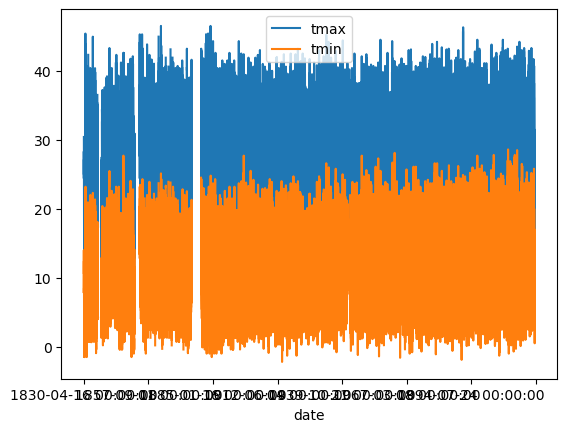

In [174]:
#Now trial a merge

df_1830_1875 = Historical[['Max_1',"Min_1"]]
df_1830_1875 = df_1830_1875.rename(columns={"Max_1":"tmax"})
df_1830_1875 = df_1830_1875.rename(columns={"Min_1":"tmin"})
df_1880_2021 = Present
df_missing_dates = Missing_Data 




dfs = [df_1830_1875, df_missing_dates, df_1880_2021]
df_merged = pd.concat(dfs,axis = 0)

# Sort the DataFrame by the "date" column
#df_merged.sort_values(by="date", inplace=True)

# Reset the index of the DataFrame
#df_merged.reset_index(drop=True, inplace=True)
df_merged.plot()

In [175]:
df_1830_1875

tmax  tmin
date                           
1830-04-16 00:00:00  25.1   NaN
1830-04-17 00:00:00  25.8  10.7
1830-04-18 00:00:00  28.3  13.3
1830-04-19 00:00:00  26.7  14.0
1830-04-20 00:00:00  24.4   7.8
...                   ...   ...
1875-12-28 00:00:00  37.8   NaN
1875-12-29 00:00:00  35.4  18.7
1875-12-30 00:00:00  33.0  17.2
1875-12-31 00:00:00  25.7  15.1
1876-01-01 00:00:00   NaN  14.4

[16697 rows x 2 columns]

In [179]:
df_missing_dates.head(50)

tmax  tmin
date                  
1876-01-01   NaN   NaN
1876-01-02   NaN   NaN
1876-01-03   NaN   NaN
1876-01-04   NaN   NaN
1876-01-05   NaN   NaN
1876-01-06   NaN   NaN
1876-01-07   NaN   NaN
1876-01-08   NaN   NaN
1876-01-09   NaN   NaN
1876-01-10   NaN   NaN
1876-01-11   NaN   NaN
1876-01-12   NaN   NaN
1876-01-13   NaN   NaN
1876-01-14   NaN   NaN
1876-01-15   NaN   NaN
1876-01-16   NaN   NaN
1876-01-17   NaN   NaN
1876-01-18   NaN   NaN
1876-01-19   NaN   NaN
1876-01-20   NaN   NaN
1876-01-21   NaN   NaN
1876-01-22   NaN   NaN
1876-01-23   NaN   NaN
1876-01-24   NaN   NaN
1876-01-25   NaN   NaN
1876-01-26   NaN   NaN
1876-01-27   NaN   NaN
1876-01-28   NaN   NaN
1876-01-29   NaN   NaN
1876-01-30   NaN   NaN
1876-01-31   NaN   NaN
1876-02-01   NaN   NaN
1876-02-02   NaN   NaN
1876-02-03   NaN   NaN
1876-02-04   NaN   NaN
1876-02-05   NaN   NaN
1876-02-06   NaN   NaN
1876-02-07   NaN   NaN
1876-02-08   NaN   NaN
1876-02-09   NaN   NaN
1876-02-10   NaN   NaN
1876-02-11   NaN   NaN
1876-02-12   NaN   NaN
1876-02-13   NaN   NaN
1876-02-14   NaN   NaN
1876-02-15   NaN   NaN
1876-02-16   NaN   NaN
1876-02-17   NaN   NaN
1876-02-18   NaN   NaN
1876-02-19   NaN   NaN

In [180]:
#Now the trials for all


<AxesSubplot:xlabel='date'>

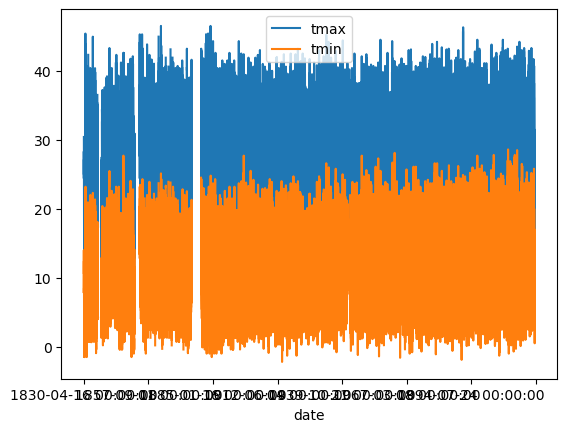

In [181]:
#Now trial a merge

df_1830_1875 = Historical[['Max_1',"Min_1"]]
df_1830_1875 = df_1830_1875.rename(columns={"Max_1":"tmax"})
df_1830_1875 = df_1830_1875.rename(columns={"Min_1":"tmin"})
df_1880_2021 = Present
df_missing_dates = Missing_Data 




dfs = [df_1830_1875, df_missing_dates, df_1880_2021]
df_merged = pd.concat(dfs,axis = 0)

# Sort the DataFrame by the "date" column
#df_merged.sort_values(by="date", inplace=True)

# Reset the index of the DataFrame
#df_merged.reset_index(drop=True, inplace=True)
df_merged.plot()

In [188]:
df_merged['date'] = df_merged['date'].dt.date
# Extract only the year, month, and day


KeyError: 'date'

In [209]:
#Now lets do the trials
#Gte the present the missing gap
df_new = Present
df_gapped = Missing_Data 

#Lets combine the 1875 thorugh to 2021
combined_New = pd.concat([df_gapped, df_new],axis = 0)



#--------------------- BEGIN RUN

#Initial Run
i = 1

#Historical Trial
df_old = Historical[['Max_{}'.format(i),"Min_{}".format(i)]]
df_old = df_old.rename(columns={"Max_{}".format(i):"tmax"}).rename(columns={"Min_{}".format(i):"tmin"})

#Combine them together
combined_timeseries = pd.concat([df_old, df_new],axis = 0)
combined_timeseries = combined_timeseries.rename(columns={"tmax":"Max_{}".format(i)}).rename(columns={"tmin":"Min_{}".format(i)})

Entirety_Data = combined_timeseries.reset_index()

for i in range(2,1001):
    #Historical Trial
    df_old = Historical[['Max_{}'.format(i),"Min_{}".format(i)]]
    df_old = df_old.rename(columns={"Max_{}".format(i):"tmax"}).rename(columns={"Min_{}".format(i):"tmin"})

    #Combine them together
    precombined_timeseries = [df_old, df_gapped, df_new]
    combined_timeseries = pd.concat(precombined_timeseries,axis = 0)

    combined_timeseries = combined_timeseries.rename(columns={"tmax":"Max_{}".format(i)}).rename(columns={"tmin":"Min_{}".format(i)})
    combined_timeseries = combined_timeseries.reset_index()
    Entirety_Data = Entirety_Data

    #Combine the trials together
    Entirety_Data = pd.merge(Entirety_Data,combined_timeseries, on = 'date')
    print(i)



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [224]:
Entirety_Data.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\ACORN_SAT_HOMO_1830_1875.csv")


In [226]:
Entirety_Data#.resample('Y').mean().plot()

Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  Min_4  \
date                                                                          
1830-04-16 00:00:00   25.1    NaN   25.1    NaN   25.1    NaN   25.1    NaN   
1830-04-17 00:00:00   25.8   10.7   25.8   10.8   25.8   10.8   25.8   11.5   
1830-04-18 00:00:00   28.3   13.3   28.3   13.2   28.5   13.0   27.8   13.3   
1830-04-19 00:00:00   26.7   14.0   26.3   14.0   26.6   13.9   26.3   14.1   
1830-04-20 00:00:00   24.4    7.8   24.3    7.9   24.2    7.9   24.4    7.8   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2021-06-26 00:00:00   20.3    5.8   20.3    5.8   20.3    5.8   20.3    5.8   
2021-06-27 00:00:00   15.6    8.7   15.6    8.7   15.6    8.7   15.6    8.7   
2021-06-28 00:00:00   19.7   10.5   19.7   10.5   19.7   10.5   19.7   10.5   
2021-06-29 00:00:00   18.0   12.5   18.0   12.5   18.0   12.5   18.0   12.5   
2021-06-30 00:00:00   16.8    7.7   16.8    7.7   16.8    7.7   16.8    7.7   

                     Max_5  Min_5  ...  Max_996  Min_996  Max_997  Min_997  \
date                               ...                                       
1830-04-16 00:00:00   25.1    NaN  ...     25.1      NaN  25.1000      NaN   
1830-04-17 00:00:00   25.8   10.8  ...     25.8     10.6  25.8000     10.6   
1830-04-18 00:00:00   28.2   13.2  ...     28.4     13.0  28.3000     13.0   
1830-04-19 00:00:00   26.3   14.1  ...     26.2     14.0  26.3000     14.0   
1830-04-20 00:00:00   24.4    7.9  ...     24.4      7.8  24.3605      7.7   
...                    ...    ...  ...      ...      ...      ...      ...   
2021-06-26 00:00:00   20.3    5.8  ...     20.3      5.8  20.3000      5.8   
2021-06-27 00:00:00   15.6    8.7  ...     15.6      8.7  15.6000      8.7   
2021-06-28 00:00:00   19.7   10.5  ...     19.7     10.5  19.7000     10.5   
2021-06-29 00:00:00   18.0   12.5  ...     18.0     12.5  18.0000     12.5   
2021-06-30 00:00:00   16.8    7.7  ...     16.8      7.7  16.8000      7.7   

                     Max_998  Min_998  Max_999  Min_999  Max_1000  Min_1000  
date                                                                         
1830-04-16 00:00:00     25.1      NaN     25.1      NaN      25.1       NaN  
1830-04-17 00:00:00     25.8     10.7     25.8     10.9      25.8      10.6  
1830-04-18 00:00:00     27.8     13.0     28.2     13.4      28.1      13.2  
1830-04-19 00:00:00     26.6     13.9     26.4     14.1      26.2      13.9  
1830-04-20 00:00:00     24.4      7.8     24.4      7.8      24.4       7.8  
...                      ...      ...      ...      ...       ...       ...  
2021-06-26 00:00:00     20.3      5.8     20.3      5.8      20.3       5.8  
2021-06-27 00:00:00     15.6      8.7     15.6      8.7      15.6       8.7  
2021-06-28 00:00:00     19.7     10.5     19.7     10.5      19.7      10.5  
2021-06-29 00:00:00     18.0     12.5     18.0     12.5      18.0      12.5  
2021-06-30 00:00:00     16.8      7.7     16.8      7.7      16.8       7.7  

[68378 rows x 2000 columns]

(-30000, -20000)

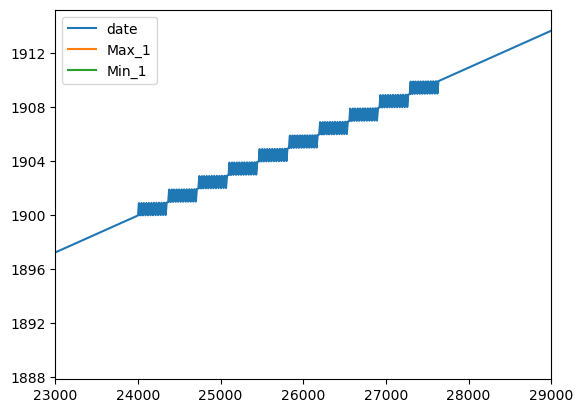

In [145]:
Entirety_Data.plot()
plt.xlim([23000,29000])
plt.ylim([-30000,-20000])

In [146]:
df_1830_1875 = Historical[['Max_2',"Min_2"]]
df_1830_1875

Max_2  Min_2
date                    
1830-04-16   25.1    NaN
1830-04-17   25.8   10.8
1830-04-18   28.3   13.2
1830-04-19   26.3   14.0
1830-04-20   24.3    7.9
...           ...    ...
1875-12-28   38.0    NaN
1875-12-29   35.4   18.0
1875-12-30   33.0   13.4
1875-12-31   25.5   14.1
1876-01-01    NaN   14.5

[16697 rows x 2 columns]

In [25]:
df_1830_1875 = Historical[['Max_3',"Min_3"]]
df_1830_1875

Max_3  Min_3
date                    
1830-04-16  25.10    NaN
1830-04-17  25.80   10.8
1830-04-18  28.50   13.0
1830-04-19  26.60   13.9
1830-04-20  24.20    7.9
...           ...    ...
1875-12-28  38.20    NaN
1875-12-29  35.64   18.1
1875-12-30  33.00   13.4
1875-12-31  25.70   14.1
1876-01-01    NaN   14.4

[16697 rows x 2 columns]

In [53]:
Historical

Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  Min_4  Max_5  \
date                                                                        
1830-04-16   25.1    NaN   25.1    NaN  25.10    NaN   25.1    NaN  25.10   
1830-04-17   25.8   10.7   25.8   10.8  25.80   10.8   25.8   11.5  25.80   
1830-04-18   28.3   13.3   28.3   13.2  28.50   13.0   27.8   13.3  28.20   
1830-04-19   26.7   14.0   26.3   14.0  26.60   13.9   26.3   14.1  26.30   
1830-04-20   24.4    7.8   24.3    7.9  24.20    7.9   24.4    7.8  24.40   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1875-12-28   37.8    NaN   38.0    NaN  38.20    NaN   38.2    NaN  38.20   
1875-12-29   35.4   18.7   35.4   18.0  35.64   18.1   35.8   18.1  35.64   
1875-12-30   33.0   17.2   33.0   13.4  33.00   13.4   33.0   13.4  33.00   
1875-12-31   25.7   15.1   25.5   14.1  25.70   14.1   25.7   14.1  25.70   
1876-01-01    NaN   14.4    NaN   14.5    NaN   14.4    NaN   14.4    NaN   

              Min_5  ...  Max_996  Min_996  Max_997  Min_997  Max_998  \
date                 ...                                                
1830-04-16      NaN  ...  25.1000      NaN  25.1000      NaN     25.1   
1830-04-17  10.8000  ...  25.8000     10.6  25.8000     10.6     25.8   
1830-04-18  13.2000  ...  28.4000     13.0  28.3000     13.0     27.8   
1830-04-19  14.1000  ...  26.2000     14.0  26.3000     14.0     26.6   
1830-04-20   7.9000  ...  24.4000      7.8  24.3605      7.7     24.4   
...             ...  ...      ...      ...      ...      ...      ...   
1875-12-28      NaN  ...  38.1715      NaN  38.2000      NaN     37.8   
1875-12-29  18.1000  ...  35.7000     18.1  35.8000     18.1     35.4   
1875-12-30  13.3739  ...  33.0000     13.4  33.0000     13.4     33.0   
1875-12-31  14.0000  ...  25.7000     14.1  25.8000     14.1     25.7   
1876-01-01  14.6000  ...      NaN     14.4      NaN     14.4      NaN   

            Min_998  Max_999  Min_999  Max_1000  Min_1000  
date                                                       
1830-04-16      NaN     25.1      NaN     25.10       NaN  
1830-04-17     10.7     25.8     10.9     25.80      10.6  
1830-04-18     13.0     28.2     13.4     28.10      13.2  
1830-04-19     13.9     26.4     14.1     26.20      13.9  
1830-04-20      7.8     24.4      7.8     24.40       7.8  
...             ...      ...      ...       ...       ...  
1875-12-28      NaN     38.0      NaN     38.10       NaN  
1875-12-29     18.7     35.4     18.1     35.64      18.7  
1875-12-30     17.3     32.9     13.4     33.00      17.2  
1875-12-31     15.3     25.7     14.1     25.70      15.3  
1876-01-01     14.4      NaN     14.5       NaN      14.4  

[16697 rows x 2000 columns]

In [115]:

combined_timeseries = pd.concat([df_gapped, df_new],axis = 0)

<AxesSubplot:xlabel='date'>

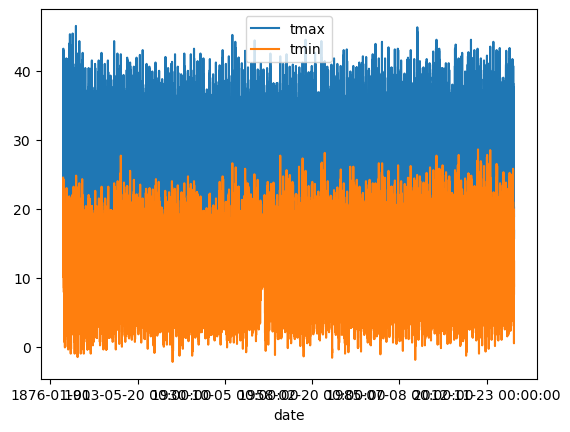

In [117]:
combined_timeseries.plot()

In [141]:
df_1880_2021.loc["1896-01-01":"1897-01-01"].head(50)

tmax  tmin
date                  
1896-01-01  34.4  20.4
1896-01-02  40.4  21.5
1896-01-03  41.0  22.0
1896-01-04  44.3  23.7
1896-01-05  42.6  16.8
1896-01-06  29.0  13.9
1896-01-07  27.5  16.8
1896-01-08  32.5  17.4
1896-01-09  25.8  14.4
1896-01-10  27.5  13.9
1896-01-11  26.7  14.4
1896-01-12  25.8  13.9
1896-01-13  23.5  11.5
1896-01-14  29.0  13.9
1896-01-15  32.5  14.4
1896-01-16  33.0  17.4
1896-01-17  30.4  13.4
1896-01-18  29.7  15.3
1896-01-19  33.5  19.3
1896-01-20  34.4  12.8
1896-01-21  29.7  13.4
1896-01-22  37.6  19.3
1896-01-23  32.5  13.4
1896-01-24  23.1   9.9
1896-01-25  27.5  13.4
1896-01-26  33.9  16.8
1896-01-27  37.6  23.2
1896-01-28  38.7  20.4
1896-01-29  39.3  22.6
1896-01-30  37.6  20.4
1896-01-31  36.0  22.0
1896-02-01  33.0  14.4
1896-02-02  33.5  17.4
1896-02-03  36.0  18.7
1896-02-04  36.0  18.1
1896-02-05  33.9  19.8
1896-02-06  37.1  19.8
1896-02-07  37.1  20.9
1896-02-08  38.7  23.2
1896-02-09  38.2  22.6
1896-02-10  36.5   9.3
1896-02-11  32.5  18.1
1896-02-12  32.5  17.4
1896-02-13  33.5  17.4
1896-02-14  29.7  18.7
1896-02-15  31.1  17.4
1896-02-16  30.4  18.1
1896-02-17  25.1  12.0
1896-02-18  22.6   9.3
1896-02-19  25.1  12.8

In [227]:
Entirety_Data = Entirety_Data.reset_index()
Entirety_Data['date'] = pd.to_datetime(Entirety_Data['date'],format = "%Y-%m-%d")


In [229]:
Entirety_Data = Entirety_Data.set_index('date')

In [230]:
Entirety_Data.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\ACORN_SAT_HOMO_1830_1875.csv")


In [233]:
Entirety_Data.resample('Y').mean().plot(figsize = ([20,10]))

<AxesSubplot:xlabel='date'>